# Overview
This is our teams first attempt to explore the MTA Data!!

-  Stations with maximum traffic 
    - Traffic = Entries + Exit
-  Aggregated Traffic by Month for all stations
-  Aggregate data by time across stations
-  Office Locations by Stations
-  Explore data for 2 years
-  Cleaning Data
    -  See if there any nulls
    -  See if the station names have errors

In [1]:
import pandas as pd
import numpy as np
import math


In [2]:
!ls

Analysis Plan.ipynb     MTA Data Analysis.ipynb file_cleaner.sh
DownloadData.ipynb      README.md               merged_file.txt


In [3]:
mta_data = pd.read_csv("turnstile_190316.txt")

FileNotFoundError: [Errno 2] File b'turnstile_190316.txt' does not exist: b'turnstile_190316.txt'

## Exploring the Data

The next steps we will explore the data to get a better understanding of the data

In [ ]:
mta_data.head()

In [ ]:
stations = mta_data["STATION"].unique()

In [ ]:
len(stations)

### Group by


In [ ]:
mta_entries_exit_by_station = mta_data.groupby(['STATION'])[["ENTRIES","EXITS"]].agg('sum')

In [ ]:
list(mta_data)

In [ ]:
mta_entries_exit_by_station.describe()

In [ ]:
mta_entries_exit_by_station.sort_values(by="ENTRIES", ascending=False).head(10)

In [ ]:
mta_entries_exit_by_station.sort_values(by="EXITS", ascending=False).head(10)

In [ ]:
mta_data['TOTAL'] = mta_data['ENTRIES'] + mta_data['EXITS']

In [ ]:
mta_data

In [ ]:
mta_total_by_station = mta_data.groupby(['STATION'], as_index=False)[["TOTAL"]].agg('sum')

In [ ]:
mta_top_10_stations = mta_total_by_station.sort_values(by="TOTAL", ascending=False).head(10)

## Graphing

This is to graph the data

* !pip install seaborn

In [ ]:
import matplotlib as plt

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [ ]:
mta_total_by_station

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot('STATION', 'TOTAL', data=mta_top_10_stations)

In [ ]:
mta_top_10_stations

In [ ]:
!pip install requests BeautifulSoup4

## Tahmid Sandbox:

In [6]:
data_raw = pd.read_csv('merged_file.txt')

In [7]:
data_raw.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803


In [8]:
data_raw.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
10346281,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/29/2019,05:00:00,REGULAR,5554,370
10346282,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/29/2019,09:00:00,REGULAR,5554,374
10346283,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/29/2019,13:00:00,REGULAR,5554,374
10346284,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/29/2019,17:00:00,REGULAR,5554,374
10346285,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/29/2019,21:00:00,REGULAR,5554,374


In [9]:
data_raw.describe()

,ENTRIES,EXITS
count,1.034629e+07,1.034629e+07
mean,3.994067e+07,3.278422e+07
std,2.070362e+08,1.912352e+08
min,0.000000e+00,0.000000e+00
25%,4.796342e+05,2.282510e+05
50%,2.497562e+06,1.413401e+06
75%,6.903551e+06,4.810193e+06
max,2.144893e+09,2.146093e+09


In [10]:
data_zero = data_raw[data_raw.ENTRIES != 0]

In [11]:
data_zero = data_zero[data_zero.EXITS != 0]

In [12]:
data_zero.describe()

,ENTRIES,EXITS
count,9.789058e+06,9.789058e+06
mean,4.158799e+07,3.464631e+07
std,2.125682e+08,1.964388e+08
min,1.000000e+00,1.000000e+00
25%,6.310660e+05,3.378712e+05
50%,2.796608e+06,1.636306e+06
75%,7.122874e+06,5.089708e+06
max,2.144893e+09,2.146093e+09


In [13]:
data_sample = data_zero.sample(100000)

In [14]:
data_sample.describe()

,ENTRIES,EXITS
count,1.000000e+05,1.000000e+05
mean,4.186855e+07,3.481769e+07
std,2.132880e+08,1.961311e+08
min,1.000000e+00,1.000000e+00
25%,6.345035e+05,3.396178e+05
50%,2.809380e+06,1.639964e+06
75%,7.186918e+06,5.111328e+06
max,2.130152e+09,2.124333e+09


In [15]:
data_sample.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [16]:
data_sample['STATION']

6006991         STEINWAY ST
4997542     42 ST-PORT AUTH
9345072       BEVERLEY ROAD
7210835           CHURCH AV
5025885       NORTHERN BLVD
10194586     34 ST-PENN STA
3813930     42 ST-PORT AUTH
6092486       HARLEM 148 ST
1014374            BROAD ST
3963290          5 AV/59 ST
3640322         174-175 STS
258660          CHAMBERS ST
9081148               51 ST
8316066               49 ST
3965431      TIMES SQ-42 ST
4851639                7 AV
3359309       FLUSHING-MAIN
6703445     34 ST-HUDSON YD
1904333      JAMAICA CENTER
5143190          ST. GEORGE
1454715         CHAMBERS ST
2184049         SARATOGA AV
2541868               59 ST
5414865                7 AV
165295           FORDHAM RD
8812043      47-50 STS ROCK
8633702          9TH STREET
1467219         BEACH 67 ST
4694313              181 ST
7305165         GUN HILL RD
                 ...       
3167322         KINGSTON AV
7193868           BRIARWOOD
9173197               86 ST
9221343      47-50 STS ROCK
2020102             

In [17]:
data_sample.STATION.value_counts()

34 ST-PENN STA     2035
FULTON ST          1953
23 ST              1508
GRD CNTRL-42 ST    1471
34 ST-HERALD SQ    1193
CHAMBERS ST        1187
CANAL ST           1182
59 ST              1149
TIMES SQ-42 ST     1119
86 ST              1097
14 ST              1052
WALL ST            1049
ATL AV-BARCLAY     1041
42 ST-PORT AUTH    1026
PATH NEW WTC        972
125 ST              897
CORTLANDT ST        881
59 ST COLUMBUS      877
14 ST-UNION SQ      864
47-50 STS ROCK      829
50 ST               796
CHURCH AV           778
METS-WILLETS PT     775
96 ST               771
161/YANKEE STAD     755
LEXINGTON AV/53     719
JAY ST-METROTEC     702
BOWLING GREEN       695
28 ST               688
BOROUGH HALL        605
                   ... 
225 ST               66
VAN SICLEN AVE       66
SHEPHERD AV          65
25 AV                65
KOSCIUSZKO ST        65
FOREST AVE           64
PARKSIDE AV          64
NEREID AV            64
39 AV                64
138/GRAND CONC       63
BUSHWICK AV     

In [18]:
pd.set_option('display.max_rows',10000)

In [19]:
data_sample.TIME.value_counts()

04:00:00    7697
12:00:00    7632
16:00:00    7622
20:00:00    7595
00:00:00    7583
08:00:00    7525
17:00:00    3875
09:00:00    3865
21:00:00    3865
05:00:00    3842
13:00:00    3814
01:00:00    3776
15:00:00    3558
11:00:00    3477
07:00:00    3471
23:00:00    3405
03:00:00    3392
19:00:00    3373
02:00:00     289
10:00:00     283
14:00:00     280
22:00:00     278
06:00:00     266
18:00:00     266
16:22:00      87
20:22:00      85
12:22:00      83
04:22:00      82
00:22:00      79
08:22:00      76
19:22:00      58
10:30:00      51
06:30:00      47
14:30:00      46
11:22:00      45
18:30:00      45
15:22:00      43
02:30:00      41
22:30:00      38
07:22:00      38
03:22:00      36
21:30:00      36
23:22:00      34
16:30:00      31
01:30:00      30
13:30:00      29
00:30:00      28
17:30:00      28
07:30:00      25
04:30:00      24
09:30:00      24
05:30:00      22
19:30:00      20
12:30:00      19
20:30:00      19
11:30:00      19
08:30:00      18
15:30:00      17
23:30:00      

In [20]:
data_zero.TIME.value_counts()

04:00:00    746556
08:00:00    746291
16:00:00    746150
20:00:00    746145
12:00:00    745787
00:00:00    745059
05:00:00    372655
17:00:00    372526
09:00:00    372510
21:00:00    372455
13:00:00    372374
01:00:00    369679
03:00:00    339026
07:00:00    338878
19:00:00    338768
11:00:00    338765
15:00:00    338753
23:00:00    338730
18:00:00     27552
14:00:00     27519
10:00:00     27514
22:00:00     27486
06:00:00     27437
02:00:00     27283
12:22:00      7994
08:22:00      7989
20:22:00      7987
04:22:00      7986
16:22:00      7985
00:22:00      7929
15:22:00      4625
03:22:00      4625
07:22:00      4615
11:22:00      4608
19:22:00      4604
23:22:00      4599
10:30:00      4228
22:30:00      4224
18:30:00      4221
14:30:00      4220
06:30:00      4211
02:30:00      4184
01:30:00      2727
05:30:00      2698
09:30:00      2694
17:30:00      2679
13:30:00      2675
21:30:00      2665
20:30:00      2456
04:30:00      2447
08:30:00      2445
16:30:00      2444
12:30:00    

In [21]:
import datetime as dt

In [22]:
data_sample['TIME'] = pd.to_datetime(data_sample['TIME'],format= '%H:%M:%S' ).dt.time

In [23]:
data_sample.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [24]:
data_sample.TIME.value_counts()

04:00:00    7697
12:00:00    7632
16:00:00    7622
20:00:00    7595
00:00:00    7583
08:00:00    7525
17:00:00    3875
09:00:00    3865
21:00:00    3865
05:00:00    3842
13:00:00    3814
01:00:00    3776
15:00:00    3558
11:00:00    3477
07:00:00    3471
23:00:00    3405
03:00:00    3392
19:00:00    3373
02:00:00     289
10:00:00     283
14:00:00     280
22:00:00     278
06:00:00     266
18:00:00     266
16:22:00      87
20:22:00      85
12:22:00      83
04:22:00      82
00:22:00      79
08:22:00      76
19:22:00      58
10:30:00      51
06:30:00      47
14:30:00      46
18:30:00      45
11:22:00      45
15:22:00      43
02:30:00      41
22:30:00      38
07:22:00      38
03:22:00      36
21:30:00      36
23:22:00      34
16:30:00      31
01:30:00      30
13:30:00      29
00:30:00      28
17:30:00      28
07:30:00      25
04:30:00      24
09:30:00      24
05:30:00      22
19:30:00      20
20:30:00      19
11:30:00      19
12:30:00      19
08:30:00      18
15:30:00      17
23:30:00      

In [60]:
data_sample.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
6006991,N315,R238,00-00-03,STEINWAY ST,MR,IND,08/01/2018,12:00:00,REGULAR,6137758,6707291
4997542,N063A,R011,00-00-09,42 ST-PORT AUTH,ACENQRS1237W,IND,06/28/2018,16:00:00,REGULAR,452622,163653
9345072,B017,R262,00-00-00,BEVERLEY ROAD,BQ,BMT,02/26/2019,19:00:00,REGULAR,4462240,2234976
7210835,N546,R204,00-00-00,CHURCH AV,FG,IND,09/13/2018,00:00:00,REGULAR,5955083,15913441
5025885,N318,R298,00-00-00,NORTHERN BLVD,MR,IND,06/28/2018,05:00:00,REGULAR,5772168,6433101
10194586,N067,R012,00-00-02,34 ST-PENN STA,ACE,IND,03/29/2019,12:00:00,REGULAR,8453045,10903247
3813930,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,05/16/2018,06:00:00,REGULAR,14059251,12237610
6092486,R309,R345,00-00-01,HARLEM 148 ST,3,IRT,07/29/2018,08:00:00,REGULAR,1678268,1315805
1014374,A083,R125,00-00-04,BROAD ST,JZ,BMT,02/07/2018,20:00:00,REGULAR,26370,150107
3963290,A006,R079,00-03-00,5 AV/59 ST,NQRW,BMT,05/22/2018,06:00:00,REGULAR,8714590,3843460


In [25]:
data_sample.iloc[5:7]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
10194586,N067,R012,00-00-02,34 ST-PENN STA,ACE,IND,03/29/2019,12:00:00,REGULAR,8453045,10903247
3813930,N060,R010,01-00-01,42 ST-PORT AUTH,ACENGRS1237W,IND,05/16/2018,06:00:00,REGULAR,14059251,12237610


In [67]:
data_sample.iloc[5]['TIME'] > data_sample.iloc[6]['TIME'] 

True

In [27]:
data_s_round = data_sample[data_sample[TIME].dt.total_seconds() != 0]

NameError: name 'TIME' is not defined

In [28]:
entries_sample, exits_sample, station_sample = data_sample.ENTRIES, data_sample.EXITS, data_sample.STATION

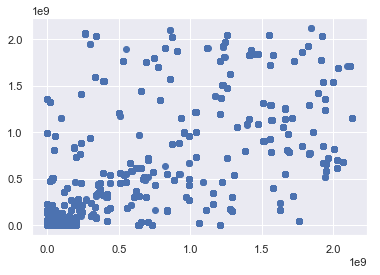

In [31]:
plt.scatter(entries_sample, exits_sample)

<BarContainer object of 100000 artists>

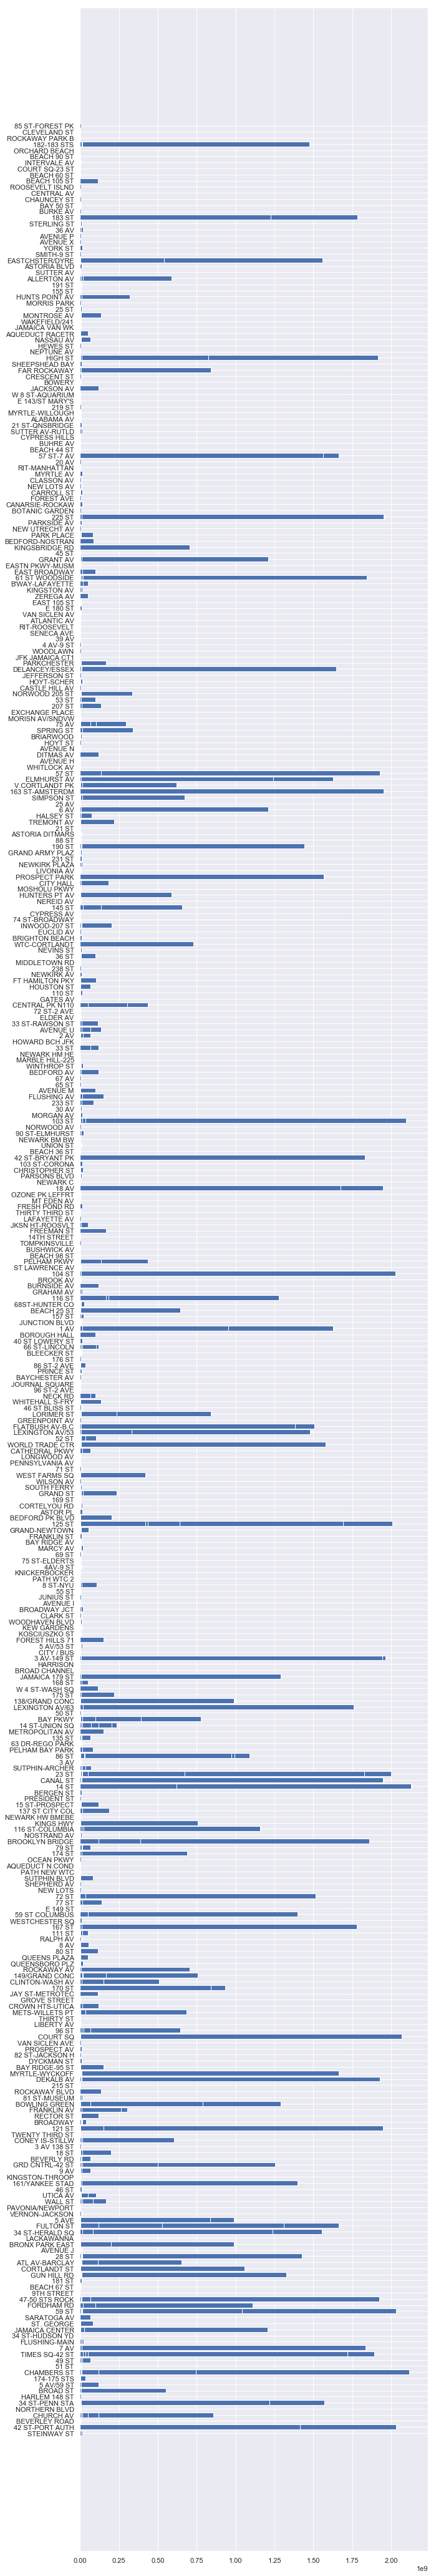

In [48]:
plt.figure(figsize=[10,75])
plt.barh(station_sample, entries_sample)

In [59]:
data_zero.groupby(['STATION','DATE','TIME'])[['ENTRIES','EXITS']].sum()

ENTRIES       EXITS
STATION         DATE       TIME                            
1 AV            01/01/2018 03:00:00  3042947337  1642545068
                           07:00:00  3042947783  1642545819
                           11:00:00  3042948650  1642546913
                           15:00:00  3042951071  1642549240
                           19:00:00  3042953851  1642552699
                           23:00:00  3042955764  1642554992
                01/01/2019 03:00:00  3041094366  1629407523
                           07:00:00  3041094797  1629408278
                           11:00:00  3041095642  1629409353
                           15:00:00  3041097952  1629411659
                           19:00:00  3041100841  1629415214
                           23:00:00  3041102742  1629417499
                01/02/2018 03:00:00  3042956363  1642555532
                           07:00:00  3042956819  1642556815
                           11:00:00  3042961508  1642562910
                           15:00:00  3042964925  1642566445
                           19:00:00  3042971928  1642572818
                           23:00:00  3042975031  1642576860
                01/02/2019 03:00:00  3041103233  1629417929
                           07:00:00  3041103591  1629418997
                           11:00:00  3041107950  1629425151
                           15:00:00  3041111287  1629428869
                           19:00:00  3041118032  1629435069
                           23:00:00  3041121218  1629438557
                01/03/2018 03:00:00  3042975878  1642577484
                           07:00:00  3042976414  1642578890
                           11:00:00  3042981489  1642585488
                           15:00:00  3042985038  1642589124
                           19:00:00  3042992446  1642595561
                           23:00:00  3042996295  1642599841
                01/03/2019 03:00:00  3041121874  1629439048
                           07:00:00  3041122321  1629440261
                           11:00:00  3041127052  1629446665
                           15:00:00  3041130455  1629450445
                           19:00:00  3041137399  1629457064
                           23:00:00  3041141084  1629461088
                01/04/2018 03:00:00  3042997290  1642600570
                           07:00:00  3042997697  1642601709
                           11:00:00  3043001524  1642605279
                           11:15:12   449406162   440102727
                           15:00:00  3043004119  1642607965
                           19:00:00  3043007436  1642611903
                           23:00:00  3043009300  1642614042
                01/04/2019 03:00:00  3041141779  1629461694
                           07:00:00  3041142170  1629462896
                           11:00:00  3041146784  1629469367
                           15:00:00  3041150476  1629473221
                           19:00:00  3041157168  1629479954
                           23:00:00  3041161473  1629484721
                01/05/2018 03:00:00  3043009917  1642614500
                           07:00:00  3043010328  1642615445
                           11:00:00  3043015228  1642621371
                           15:00:00  3043018777  1642625058
                           19:00:00  3043024923  1642631488
                           23:00:00  3043028808  1642636466
                01/05/2019 03:00:00  3041162955  1629485822
                           07:00:00  3041163250  1629486308
                           11:00:00  3041164606  1629488433
                           15:00:00  3041167731  1629492024
                           19:00:00  3041171851  1629497379
                           23:00:00  3041175403  1629501382
                01/06/2018 03:00:00  3043030385  1642637672
                           07:00:00  3043030683  1642638137
                           11:00:00  3043032189  1642640322
                           15:00:00  3043035653  1642644059
                    